<a href="https://colab.research.google.com/github/RealMyeong/AIFFELTHON/blob/main/JinMyeong/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



- TPU 사용

In [2]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [3]:
strategy = tf.distribute.TPUStrategy(resolver)


- 한글 폰트 깨짐 해결

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 한글 지원 폰트
plt.rc('font', family='NanumBarunGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

## json to csv

```
import pandas as pd

with open('jsonfile.json', encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile)

df.to_csv('csvfile.csv', encoding='utf-8', index=False)
```

In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# # Mecab 설치
# !apt-get update
# !apt-get install g++ openjdk-8-jdk 
# !pip3 install konlpy JPype1-py3
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re

data = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/TUNiB/train.csv')
data.head(10)

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
5,5,직장 내 괴롭힘 대화,나 이틀뒤에 가나다 음식점 예약좀 해줘. 저녁7시로.\n가나다 음식점이요.?\n응....
6,6,기타 괴롭힘 대화,35번 손님 아이스커피 두잔나왔습니다\n아이스커피? \n네 맛있게드세요\n저기요 아...
7,7,기타 괴롭힘 대화,경비아저씨 내차에 경고장 붙였어요?\n내가 여기 몇년째 사는데 아직도 내차인줄 모르...
8,8,기타 괴롭힘 대화,이거 할인 된다면서요\n 확인해보겠습니다\n 아까 저 시람은 할인 해주던데\n 네 ...
9,9,갈취 대화,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...


In [9]:
data.conversation[0]

'지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.'

In [10]:
data['class'].value_counts()

기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64

In [11]:

# 전처리 함수
def preprocess(sentence):
  sentence = re.sub(r'[^ㄱ-ㅎ가-힣.,!?]', ' ', sentence)
  sentence = re.sub(r'[ ]+', ' ', sentence)
  sentence = sentence.strip()
  return sentence

In [12]:
sen = preprocess(data.conversation[0])

In [13]:
sen

'지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게. 정말 잘못했습니다. 너가 선택해. 너가 죽을래 네 가족을 죽여줄까. 죄송합니다. 정말 잘못했습니다. 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야. 선택 못하겠습니다. 한번만 도와주세요. 그냥 다 죽여버려야겠군. 이의 없지? 제발 도와주세요.'

In [14]:
data['conversation'] = data['conversation'].apply(lambda x : preprocess(x))
data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼...
1,1,협박 대화,길동경찰서입니다. 시 분 마트에 폭발물을 설치할거다. 네? 똑바로 들어 한번만 더 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어. 그만해. 니들 놀리는거 재미없...
3,3,갈취 대화,어이 거기 예?? 너 말이야 너. 이리 오라고 무슨 일. 너 옷 좋아보인다? 얘 돈...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [15]:
data.isnull().sum()

idx             0
class           0
conversation    0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(data['class'])
num_labels = len(label_encoder.classes_)

data['class'] = np.asarray(label_encoder.transform(data['class']), dtype=np.int32)
data.head()

,idx,class,conversation
0,0,3,지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼...
1,1,3,길동경찰서입니다. 시 분 마트에 폭발물을 설치할거다. 네? 똑바로 들어 한번만 더 ...
2,2,1,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어. 그만해. 니들 놀리는거 재미없...
3,3,0,어이 거기 예?? 너 말이야 너. 이리 오라고 무슨 일. 너 옷 좋아보인다? 얘 돈...
4,4,0,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 대화와 라벨 분류
train = data['conversation'].tolist()
target = data['class'].tolist()

# train, val 분리 (20%)
train_x, val_x, train_y, val_y = train_test_split(train, target, random_state=27, test_size=0.2)

# val, test 분리 (test를 전체의 10%)
val_x, test_x, val_y, test_y = train_test_split(val_x, val_y, random_state=27, test_size=0.5)

In [18]:
len(train_x), len(val_x), len(test_x)

(3160, 395, 395)

In [19]:
HUGGINGFACE_MODEL_PATH = "klue/bert-base"

from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained(HUGGINGFACE_MODEL_PATH)

train_tensor = tokenizer(train_x, truncation=True, padding=True)
val_tensor = tokenizer(val_x, truncation=True, padding=True)


In [20]:
tokenizer.decode(tokenizer("오빠 지금 화낸거야? 팀 화이팅!!!")['input_ids'])

'[CLS] 오빠 지금 화낸거야? 팀 화이팅!!! [SEP]'

In [21]:
tokenizer("오빠 지금 화낸거야? 팀 화이팅!!!")['input_ids']

[2, 5852, 3660, 1933, 2754, 2180, 2275, 35, 1823, 21121, 5, 5, 5, 3]

In [22]:

# trainset-set
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_tensor),
    train_y
))

# validation-set
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_tensor),
    val_y
))



In [23]:
train_dataset

<TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(457,), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(457,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(457,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [24]:
len(train_dataset)

3160

In [25]:
from transformers import TFBertForSequenceClassification


with strategy.scope():
  num_labels = num_labels
  model = TFBertForSequenceClassification.from_pretrained(HUGGINGFACE_MODEL_PATH, num_labels=num_labels, from_pt=True)
  optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
  model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  110617344 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  3076      
                                                                 
Total params: 110,620,420
Trainable params: 110,620,420
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001, # acc가 최소한 얼마만큼의 상승이 있어야하는지 정해줌.
    patience=2)

history = model.fit(
    train_dataset.shuffle(len(train_dataset)).batch(16), epochs=1, batch_size=16,
    validation_data=val_dataset.shuffle(len(val_dataset)).batch(16),
    callbacks = [callback_earlystop]
)

198/198 [==============================] - 78s 161ms/step - loss: 0.4908 - accuracy: 0.8272 - val_loss: 0.3450 - val_accuracy: 0.8835


모델 저장

In [28]:
id2labels = model.config.id2label
model.config.id2label = {id : label_encoder.inverse_transform([int(re.sub('LABEL_', '', label))])[0]  for id, label in id2labels.items()}

label2ids = model.config.label2id
model.config.label2id = {label_encoder.inverse_transform([int(re.sub('LABEL_', '', label))])[0] : id   for id, label in id2labels.items()}

In [29]:
import os
DIR_PATH = '/content/drive/MyDrive/AIFFELTHON'
MODEL_NAME = 'fine-tuned-klue-bert-base'
MODEL_SAVE_PATH = os.path.join(DIR_PATH, MODEL_NAME) # change this to your preferred location

if os.path.exists(MODEL_SAVE_PATH):
    print(f"{MODEL_SAVE_PATH} -- Folder already exists \n")
else:
    os.makedirs(MODEL_SAVE_PATH, exist_ok=True)
    print(f"{MODEL_SAVE_PATH} -- Folder create complete \n")

# save tokenizer, model
model.save_pretrained(MODEL_SAVE_PATH)
tokenizer.save_pretrained(MODEL_SAVE_PATH)

/content/drive/MyDrive/AIFFELTHON/fine-tuned-klue-bert-base -- Folder already exists 



('/content/drive/MyDrive/AIFFELTHON/fine-tuned-klue-bert-base/tokenizer_config.json',
 '/content/drive/MyDrive/AIFFELTHON/fine-tuned-klue-bert-base/special_tokens_map.json',
 '/content/drive/MyDrive/AIFFELTHON/fine-tuned-klue-bert-base/vocab.txt',
 '/content/drive/MyDrive/AIFFELTHON/fine-tuned-klue-bert-base/added_tokens.json')

LOAD 모델

In [30]:
from transformers import TextClassificationPipeline

# Load Fine-tuning model
loaded_tokenizer = BertTokenizer.from_pretrained(MODEL_SAVE_PATH)
loaded_model = TFBertForSequenceClassification.from_pretrained(MODEL_SAVE_PATH)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    top_k=None
)

Some layers from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/fine-tuned-klue-bert-base were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/fine-tuned-klue-bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further t

In [31]:
# Load Test-set
test_file_path = '/content/drive/MyDrive/AIFFELTHON/TUNiB/test.json'
with open(test_file_path, mode='rt', encoding='utf-8') as f:
    test_dataset = pd.read_json(f)
test_dataset

,t_000,t_001,t_002,t_003,t_004,t_005,t_006,t_007,t_008,t_009,...,t_490,t_491,t_492,t_493,t_494,t_495,t_496,t_497,t_498,t_499
text,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...,그 사람 누구냐? 누구말하는거야? 다 알면서 모른척 하지마. 둘다 쏴버리기 전에...,야 저기야 닭꼬치 트럭왔다 응 그러네 그치? 너도 먹고 싶지? 어?나도? 그래 너 ...,안경 안쓰고 키작고통통해보이는 분이었는데 다안경안씀 쌍꺼풀없었던것같고 아 단발인가...,야 너 2학년 김민석 맞지? 네 맞는데요. 혹시 누구신가요? 내가 누군지 궁금하면 ...,...,철수야 말 들어야지 싫은데 철밥통 선생아 너 선생님한테 말버릇이 뭐야 야 내가 너말...,"양재 터널 입구 앞인데요. 사고가 났거든요? 위치가 양재 터널 맞으시죠? 네, 지금...",동생이쁘다. 나주라 안돼 우리동생건들지마. 왜 안되냐? 좀 달라고 니 목숨값으로 동...,혹시 나 오늘 2만원만 빌려주만 안돼? 응? 안돼. 나도 요즘 맨날 택시타느라 택시...,이봐 네? 누구세요? 입다물고 가진거 다내놔 경찰에 신고할거에요 할 수 있으면 해봐...,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...,엄마 저 그 돈 안해주시면 정말 큰일나요. 이유도 말하지 않고. 몇번째니 경민아....


In [32]:
test_dataset.columns

Index(['t_000', 't_001', 't_002', 't_003', 't_004', 't_005', 't_006', 't_007',
       't_008', 't_009',
       ...
       't_490', 't_491', 't_492', 't_493', 't_494', 't_495', 't_496', 't_497',
       't_498', 't_499'],
      dtype='object', length=500)

In [33]:
test_dataset_list = [{'text':test_dataset[column]['text']} for column in test_dataset.columns]
test_df = pd.DataFrame(test_dataset_list)
test_df.head()

,text
0,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...


파이프라인 이용해서 예측

In [34]:
predicted_label_list = []
predicted_score_list = []

for text in test_x:
    # predict
    preds_list = text_classifier(text)[0]

    sorted_preds_list = sorted(preds_list, key=lambda x: x['score'], reverse=True)
    predicted_label_list.append(sorted_preds_list[0]) # label
    predicted_score_list.append(sorted_preds_list[1]) # score

In [35]:
test_df = pd.DataFrame(predicted_label_list)
# 다시 인덱스를 라벨로 바꿔줌.
test_y = label_encoder.inverse_transform(test_y)
test_df['true_label'] = test_y

In [36]:
test_df.head()

,label,score,true_label
0,직장 내 괴롭힘 대화,0.989071,직장 내 괴롭힘 대화
1,협박 대화,0.587136,갈취 대화
2,갈취 대화,0.360070,기타 괴롭힘 대화
3,직장 내 괴롭힘 대화,0.973757,직장 내 괴롭힘 대화
4,직장 내 괴롭힘 대화,0.989676,직장 내 괴롭힘 대화


In [37]:
cols = test_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
test_df = test_df[cols]

In [38]:
test_df.head()

,true_label,label,score
0,직장 내 괴롭힘 대화,직장 내 괴롭힘 대화,0.989071
1,갈취 대화,협박 대화,0.587136
2,기타 괴롭힘 대화,갈취 대화,0.360070
3,직장 내 괴롭힘 대화,직장 내 괴롭힘 대화,0.973757
4,직장 내 괴롭힘 대화,직장 내 괴롭힘 대화,0.989676


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true=test_df['true_label'], y_pred=test_df['label']))

              precision    recall  f1-score   support

       갈취 대화       0.70      0.91      0.79        90
   기타 괴롭힘 대화       0.94      0.74      0.83       104
 직장 내 괴롭힘 대화       0.89      0.99      0.94       103
       협박 대화       0.95      0.79      0.86        98

    accuracy                           0.86       395
   macro avg       0.87      0.86      0.85       395
weighted avg       0.87      0.86      0.86       395



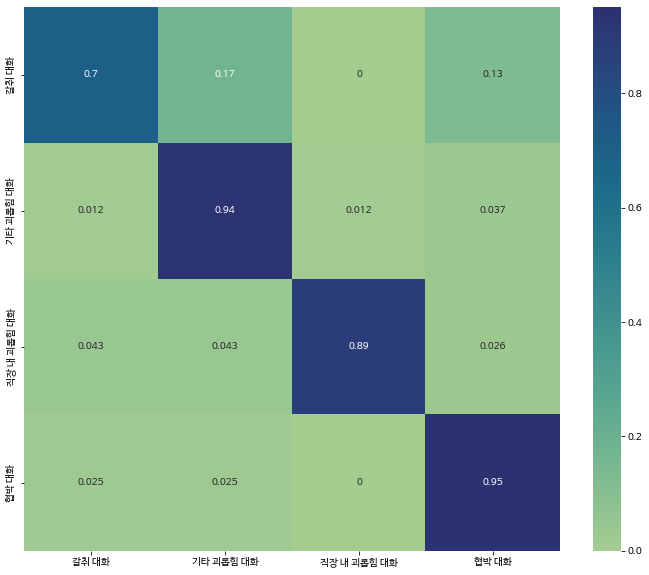

In [49]:

confusion_m = confusion_matrix(test_df['label'], test_df['true_label'], normalize='true')

plt.figure(figsize=(12,10))
sns.heatmap(confusion_m, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="crest")
plt.show()
